<a href="https://colab.research.google.com/github/DJCordhose/ai/blob/master/notebooks/2019_tf/embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embeddings

Links
* https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [1]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
print(tf.__version__)

1.12.0


### Challenge: You have a couple of airports and want to bring them into a numerical representation to enable processing with neural networks. How do you do that?

In [0]:
dictionary_size = 1000

airports = {
    # https://en.wikipedia.org/wiki/Hamburg_Airport
    "HAM": """
Hamburg Airport (IATA: HAM, ICAO: EDDH), known in German as Flughafen Hamburg, is the international airport of Hamburg,
the second-largest city in Germany. It is located 8.5 km (5.3 mi) north of the city center in the Fuhlsbüttel
quarter and serves as a base for Eurowings, Condor and easyJet. Hamburg Airport is the fifth-busiest of Germany's
commercial airports measured by the number of passengers and counted 17,622,997 passengers and 159,780 aircraft
movements in 2017. It is named after former senator of Hamburg and chancellor of Germany, Helmut Schmidt. As of
July 2017, it featured flights to more than 130 mostly European metropolitan and leisure destinations as well as
three are long-haul routes to Dubai, Tabriz and Tehran. The airport is equipped to handle wide-bodied aircraft
including the Airbus A380.    
    """,
    
    "FRA": """
Frankfurt am Main Airport (IATA: FRA, ICAO: EDDF) (German: Flughafen Frankfurt am Main, also known as Rhein-Main-Flughafen) is a major international airport located in Frankfurt, the fifth-largest city of Germany and one of the world's leading financial centres. It is operated by Fraport and serves as the main hub for Lufthansa including Lufthansa CityLine and Lufthansa Cargo as well as Condor and AeroLogic. The airport covers an area of 2,300 hectares (5,683 acres) of land and features two passenger terminals with a capacity of approximately 65 million passengers per year, four runways and extensive logistics and maintenance facilities.

Frankfurt Airport is the busiest airport by passenger traffic in Germany as well as the 4th busiest in Europe after London Heathrow Airport, Paris–Charles de Gaulle Airport and Amsterdam Airport Schiphol. The airport is also the 13th busiest worldwide by total number of passengers in 2016, with 60.786 million passengers using the airport in 2016. In 2017 Frankfurt Airport handled 64.500 million passengers. It also had a freight throughput of 2.076 million metric tonnes in 2015 and is the busiest airport in Europe by cargo traffic. As of summer 2017, Frankfurt Airport serves more than 300 destinations in 5 continents, making it the airport with the most direct routes in the world.

The southern side of the airport ground was home to the Rhein-Main Air Base, which was a major air base for the United States from 1947 until 2005, when the air base was closed and the property was acquired by Fraport. In 2017, passengers at the airport increased by 6.1% to 64,500,386 compared to 2016. The airport celebrated its 80th anniversary in July 2016    
    """,
    
    "CPH": """
Copenhagen Airport, Kastrup (Danish: Københavns Lufthavn, Kastrup; IATA: CPH, ICAO: EKCH) is the main international airport serving Copenhagen, Denmark, the entire Zealand, the Øresund Region, and a large part of southern Sweden including Scania. It is the largest airport in the Nordic countries with 29 million passengers in 2016 and one of the oldest international airports in Europe. It is the third-busiest airport in Northern Europe, and the busiest for international travel in Scandinavia.

The airport is located on the island of Amager, 8 kilometres (5.0 mi) south of Copenhagen city centre, and 24 kilometres (15 mi) west of Malmö city centre via the Øresund Bridge. The airport covers an area of 11.8 square kilometres (4.6 sq mi). Most of the airport is situated in the municipality of Tårnby, with a small portion in the city of Dragør.

The airport is the main hub out of three used by Scandinavian Airlines and is also an operating base for Thomas Cook Airlines Scandinavia and Norwegian Air Shuttle. Copenhagen Airport handles around 60 scheduled airlines, and has a maximum operation capability of 83 operations/hour, and a total of 108 jet bridge and remote parking stands. Unlike other Scandinavian airports, most of the airport's passengers are international. In 2015, 6.1% of passengers travelled to and from other Danish airports, 83.5% to/from other European airports, and 10.4% were intercontinental passengers. The airport is owned by Københavns Lufthavne, which also operates Roskilde Airport. The airport employs 1,700 people (not including employees in shops, restaurants, etc.).

Copenhagen Airport was originally called Kastrup Airport, since it is located in the small town of Kastrup, now a part of the Tårnby municipality. The formal name of the airport is still Copenhagen Airport, Kastrup, to distinguish it from Roskilde Airport, whose formal name is Copenhagen Airport, Roskilde.
    """,
    
    "ARN": """
Stockholm Arlanda Airport (IATA: ARN, ICAO: ESSA), is an international airport located in the Sigtuna Municipality of Sweden, near the town of Märsta, 37 kilometres (23 mi) north of Stockholm and nearly 40 kilometres (25 mi) south-east of Uppsala. The airport is located within Stockholm County and the province of Uppland. It is the largest airport in Sweden and the third-largest airport in the Nordic countries. The airport is the major gateway to international air travel for large parts of Sweden. Arlanda Airport was used by close to 27 million passengers in 2017, with 21.2 million international passengers and 5.5 million domestic.

Stockholm Arlanda Airport is the larger of Stockholm's two airports. The other, Stockholm–Bromma, is located north-west of the city's centre, but can only be used by a small number of smaller aircraft. The smaller airports in Nyköping and Västerås are both located around 100 kilometres (60 mi) away from the Swedish capital. Stockholm Arlanda serves as a major hub for Scandinavian Airlines and Norwegian Air Shuttle.    
    """,
    
    "BGO": """
Bergen Airport, Flesland (Norwegian: Bergen lufthavn, Flesland; IATA: BGO, ICAO: ENBR) is an international airport located at Flesland in Bergen, a city and municipality in Hordaland county, Norway. Opened in 1955, it is the second-busiest airport in Norway, with 6,306,623 passengers in 2018. Flesland is operated by the state-owned Avinor. Until 1999 Flesland Air Station of the Norwegian Air Force was co-located at the airport.

Scandinavian Airlines (SAS), Norwegian Air Shuttle and Widerøe are the largest airlines operating at the airport. The route to Oslo Airport, Gardermoen is among the busiest in Europe. A substantial traffic is generated by CHC Helikopter Service and Bristow Norway to offshore oil platforms in the North Sea.

Originally Bergen was served by water aerodromes at Flatøy, Sandviken and Herdla. Financing of Flesland was largely secured through NATO funds and the airport opened on 2 October 1955. Until the 1980s, Bergen was the Norwegian airport used for SAS' intercontinental flights to New York. New terminals were opened in 1988 and in August 2017. The Bergen Light Rail was extended to the airport and opened in April 2017.    
    """,
    
    "OSL": """
Oslo Airport (Norwegian: Oslo Lufthavn; IATA: OSL, ICAO: ENGM) is the main international airport serving Oslo, Norway, the capital and most populous city in the country. A hub for Scandinavian Airlines and Widerøe, and an operating base for Norwegian Air Shuttle, it connects to 26 domestic and 151 international destinations. 28,5 million passengers traveled through the airport in 2018, making it the second-busiest commercial airport in the Nordic countries, and the nineteenth-busiest in Europe.

The airport is located 19 nautical miles (35 km; 22 mi) northeast of Oslo, at Gardermoen in the municipality of Ullensaker, in Akershus county. It has two parallel roughly north–south runways measuring 3,600 metres (11,811 ft) and 2,950 metres (9,678 ft) and 71 aircraft stands, of which 50 have jet bridges. The airport is connected to the city center by the high-speed railway Gardermoen Line served by mainline trains and Flytoget. The percentage of passengers using public transport to get to and from the airport is one of the highest in the world at nearly 70%. The ground facilities are owned by Oslo Lufthavn AS, a subsidiary of the state-owned Avinor. Also at the premises is Gardermoen Air Station, operated by the Royal Norwegian Air Force. An expansion with a new terminal building and a third pier opened in late April 2017. Oslo is also served by the low-fare airport Torp in Sandefjord, situated 119 km to the south of downtown Oslo.

The airport location was first used by the Norwegian Army from 1940, with the first military airport facilities being built during the 1940s. The airport remained a secondary reserve and airport for chartered flights to Oslo Airport, Fornebu until 8 October 1998, when the latter was closed and an all-new Oslo Airport opened at Gardermoen, costing 11.4 billion Norwegian kroner (NOK).    
    """,
    
    "LHR": """
Heathrow Airport (also known as London Heathrow) (IATA: LHR, ICAO: EGLL) is a major international airport near London, United Kingdom. Heathrow is the second busiest airport in the world by international passenger traffic, as well as the busiest airport in Europe by passenger traffic, and the seventh busiest airport in the world by total passenger traffic. It is one of six international airports serving Greater London. In 2017, it handled a record 78.0 million passengers, a 3.1% increase from 2016.

Heathrow lies 14 miles (23 km) west of Central London, and has two parallel east–west runways along with four operational terminals on a site that covers 12.27 square kilometres (4.74 sq mi). The airport is owned and operated by Heathrow Airport Holdings, which itself is owned by FGP TopCo Limited, an international consortium led by Ferrovial that also includes Qatar Holding LLC, Caisse de dépôt et placement du Québec, GIC Private Limited, Alinda Capital Partners, China Investment Corporation and Universities Superannuation Scheme (USS). London Heathrow is the primary hub for British Airways and the primary operating base for Virgin Atlantic.

In September 2012, the UK government established the Airports Commission, an independent commission chaired by Sir Howard Davies to examine various options for increasing capacity at UK airports. In July 2015, the commission backed a third runway at Heathrow, which the government approved in October 2016.    
    """,
    
    "CDG": """
Paris Charles de Gaulle Airport (French: Aéroport de Paris-Charles-de-Gaulle, IATA: CDG, ICAO: LFPG), also known as Roissy Airport (name of the local district), is the largest international airport in France and the second largest in Europe. It is named after Charles de Gaulle (1890–1970), leader of the Free French Forces during the Second World War, founder of the French Fifth Republic and President of France from 1959 to 1969. Charles de Gaulle Airport is located within portions of several communes 25 km (16 mi) to the northeast of Paris. Charles de Gaulle Airport serves as the principal hub for Air France and other legacy carriers (from Star Alliance, Oneworld and SkyTeam), as well as a focus city for low-cost carriers easyJet, Vueling, and Norwegian Air Shuttle. The Airport is operated by Groupe ADP under the brand Paris Aéroport.

In 2017, the airport handled 69,471,442 passengers and 475,654 aircraft movements, thus making it the world's tenth-busiest airport, and Europe's second-busiest airport (after London Heathrow) in terms of passenger numbers. In terms of cargo traffic, the airport is the twelfth-busiest in the world and the second-busiest in Europe (after Frankfurt Airport), handling 2,150,950 metric tonnes of cargo in 2012. Marc Houalla has been the director of the airport since 12 February 2018.    
    """,
    
    "SFO": """
San Francisco International Airport (IATA: SFO, ICAO: KSFO, FAA LID: SFO) is an international airport 13 miles (21 km) south of downtown San Francisco, California, United States, near Millbrae and San Bruno in unincorporated San Mateo County. It has flights to points throughout North America and is a major gateway to Europe and Asia.

SFO is the largest airport in Northern California and the second-busiest in California and on the Western Coast of North America, after Los Angeles International Airport. In 2017, it was the seventh-busiest airport in the United States and the 24th-busiest in the world by passenger count. It is the fifth-largest hub for United Airlines and functions as United's primary transpacific gateway. It also serves as a secondary hub for Alaska Airlines. It is a major maintenance hub for United Airlines, and houses the Louis A. Turpen Aviation Museum and Library.

SFO is owned and policed by the City and County of San Francisco, but is in San Mateo County. Between 1999 and 2004 the San Francisco Airport Commission operated city-owned SFO Enterprises, Inc., to oversee its business purchases and operations of ventures.    
    """,
    
    "AUS": """
Austin–Bergstrom International Airport or ABIA (IATA: AUS, ICAO: KAUS, FAA LID: AUS, formerly BSM) is a Class C international airport located in Austin, Texas, United States (the capital of Texas), and serving the Greater Austin metropolitan area, the 31st-largest metropolitan area in the United States. Located about 5 miles (8 km) southeast of Downtown Austin, it covers 4,242 acres (1,717 ha) and has two runways and three helipads. It is on the site of what was Bergstrom Air Force Base. The airport and Air Force base were named after Captain John August Earl Bergstrom, an officer who served with the 19th Bombardment Group. The airport replaced Robert Mueller Municipal Airport as Austin's main airport.

A total of 13,889,305 passengers traveled through the Austin–Bergstrom International Airport in 2017. The airport is now the 34th busiest airport for total passengers in the United States, and is the busiest airport in Texas outside of Dallas–Fort Worth or Houston. Annual passenger total in 2017 increased by 11.5% from the previous record year of 2016.

Scheduled passenger service began at the airport on Sunday, May 23, 1999. Currently, there are over 250 daily arrivals and 260 daily departures on the typical weekday to 76 destinations in the U.S., Canada, Mexico, the Caribbean, and Europe.    
    """,
    
    "EWR": """
Newark Liberty International Airport (IATA: EWR, ICAO: KEWR, FAA LID: EWR), originally Newark Metropolitan Airport and later Newark International Airport, is the primary airport serving the U.S. state of New Jersey. The airport straddles the boundary between the cities of Newark and Elizabeth, the former of which is the most populous city in the state. The airport is owned jointly by the cities of Elizabeth and Newark and leased to and operated by the Port Authority of New York and New Jersey.

Newark Airport is located 3 miles (4.8 km) south of Downtown Newark, and in between the cities of Philadelphia (to the southwest) and New York (to the northeast). It is one of four major airports serving the New York - Philadelphia Urban Area, the others being Philadelphia International Airport, John F. Kennedy International Airport and La Guardia Airport.

In 2017, EWR was the fifteenth busiest airport in the United States, and the forty-third busiest airport in the world by passenger traffic, serving 43,393,499 passengers.

Newark serves 50 carriers and is the third-largest hub (after Chicago–O'Hare and Houston–Intercontinental) for United Airlines, which is the airport's largest tenant (operating in all three of Newark's terminals). Newark's second-largest tenant is FedEx Express, whose third-largest cargo hub uses three buildings on two million square feet of airport property. During the 12-month period ending in July 2014, over 68% of all passengers at the airport were carried by United Airlines.    
    """,
    
    "JFK": """
John F. Kennedy International Airport (IATA: JFK, ICAO: KJFK, FAA LID: JFK) (colloquially referred to as Kennedy Airport, JFK Airport, New York-JFK, or simply JFK or Kennedy) is the primary international airport serving New York City. It is the busiest international air passenger gateway into North America, the 22nd-busiest airport in the world, the sixth-busiest airport in the United States, and the busiest airport in the New York airport system; it handled just over 59 million passengers in 2017. Over ninety airlines operate from the airport, with nonstop or direct flights to destinations in all six inhabited continents.

JFK is located in the neighborhood of Jamaica in the New York City borough of Queens, 16 miles (30 km) southeast of Midtown Manhattan. The airport features six passenger terminals and four runways. It serves as a hub for both American Airlines and Delta Air Lines, and it is the primary operating base for JetBlue Airways. JFK was also formerly a hub for Pan Am, TWA, Eastern, National, and Tower Air.

Opened as New York International Airport in 1948, it was commonly known as Idlewild Airport before being renamed in 1963 as a tribute to John F. Kennedy, the 35th President of the United States, following his assassination.    
    """

}

In [0]:
# alternative

# dictionary_size = 5

# airports = {'HAM': "germany europe regional",
#  'FRA': "germany europe hub",
#  'CPH': "denmark capital scandinavia europe hub",
#  'ARN': "sweden capital scandinavia europe regional",
#  'BGO': "norway scandinavia europe regional",
#  'OSL': "norway capital scandinavia europe regional",
#  'LHR': "gb capital europe hub",
#  'CDG': "france capital europe hub",
#  'SFO': "usa california regional",
#  'AUS': "usa texas regional",
#  'EWR': "usa new_jersey hub",
#  'JFK': "usa new_york hub"
# }

### Encode airport to number (simple)

In [0]:
airport_names = list(airports.keys())
airport_numbers = list(range(0, 12))
airport_to_number = dict(zip(airport_names, airport_numbers))
number_to_airport = dict(zip(airport_numbers, airport_names))

### Encode Texts in multi-hot / tfidf

In [0]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=dictionary_size, 
                                                  filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n0123456789',
                                                  oov_token='<NONE>')

In [0]:
texts = list(airports.values())
tokenizer.fit_on_texts(texts)

In [0]:
# tokenizer.texts_to_matrix?

In [0]:
# mode: one of "binary", "count", "tfidf", "freq".
description_matrix = tokenizer.texts_to_matrix(texts, mode='tfidf')
# description_matrix = tokenizer.texts_to_matrix(texts, mode='fref')
# description_matrix = tokenizer.texts_to_matrix(texts, mode='count')

In [9]:
len(description_matrix)

12

In [10]:
len(description_matrix[0])

1000

In [11]:
description_matrix[0]

array([0.        , 0.        , 2.01372833, 1.56046104, 1.92640862,
       1.56046104, 1.92640862, 1.70638052, 1.17360019, 0.69314718,
       1.37233812, 1.37233812, 0.65392647, 2.05743053, 0.69314718,
       0.65392647, 1.17360019, 0.        , 0.        , 0.73759894,
       0.78845736, 1.33497436, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.65392647, 0.65392647, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.09861229, 0.        , 0.91629073, 0.99852883,
       0.91629073, 0.        , 0.84729786, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.91629073,
       0.99852883, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.09861229, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.99852883,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, GlobalAveragePooling1D, Dense, LSTM, GRU, SimpleRNN, Bidirectional, Embedding
from tensorflow.keras.models import Sequential, Model

input_dim = len(airports)
embedding_dim = 1

model = Sequential()

model.add(Embedding(name='embedding',
                    input_dim=input_dim, 
                    output_dim=embedding_dim, 
                    input_length=1))

# alternative
#     model.add(GlobalAveragePooling1D())
model.add(Flatten())

model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=50, activation='relu'))

model.add(Dense(units=dictionary_size, name='output', activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 1)              12        
_________________________________________________________________
flatten (Flatten)            (None, 1)                 0         
_________________________________________________________________
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
output (Dense)               (None, 1000)              51000     
Total params: 53,662
Trainable params: 53,662
Non-trainable params: 0
_________________________________________________________________


In [0]:
x = airport_numbers
Y = description_matrix

In [14]:
Y

array([[0.        , 0.        , 2.01372833, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.64482027, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.73213998, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 2.54401706, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.73213998, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.42479217, ..., 0.        , 0.        ,
        0.        ]])

In [15]:
%time history = model.fit(x, Y, epochs=2000, verbose=0)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


CPU times: user 7.47 s, sys: 187 ms, total: 7.66 s
Wall time: 4.8 s


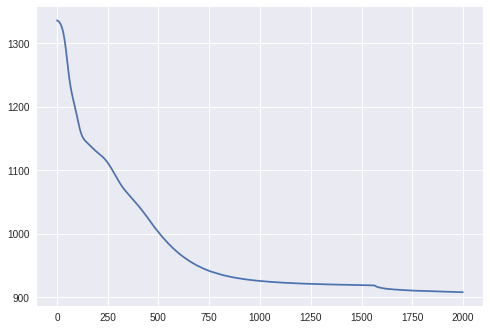

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])

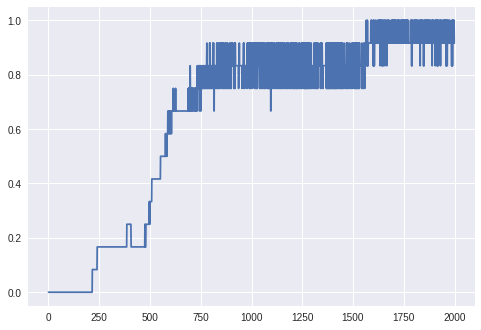

In [17]:
plt.plot(history.history['acc'])

In [18]:
model.evaluate(x, Y)

12/12 [==============================] - 0s 5ms/step


[908.1201171875, 0.9166666865348816]

In [19]:
embedding_layer = model.get_layer('embedding')
embedding_model = Model(inputs=model.input, outputs=embedding_layer.output)
embedding_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_input (InputLayer) (None, 1)                 0         
_________________________________________________________________
embedding (Embedding)        (None, 1, 1)              12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [20]:
hamburg_label = airport_to_number['HAM']
embedding = embedding_model.predict([hamburg_label])
embedding

array([[[0.52105683]]], dtype=float32)

In [0]:
all_embeddings = embedding_model.predict(airport_numbers).reshape(-1)

In [22]:
all_embeddings

array([ 0.52105683,  0.39002198, -0.5413503 , -0.12733653,  0.02175362,
       -0.38705885, -0.8314764 ,  0.99072844, -0.26044223,  0.697887  ,
        0.26081485,  0.16043386], dtype=float32)

HAM (0, 0.52105683)
FRA (1, 0.39002198)
CPH (2, -0.5413503)
ARN (3, -0.12733653)
BGO (4, 0.021753622)
OSL (5, -0.38705885)
LHR (6, -0.8314764)
CDG (7, 0.99072844)
SFO (8, -0.26044223)
AUS (9, 0.697887)
EWR (10, 0.26081485)
JFK (11, 0.16043386)


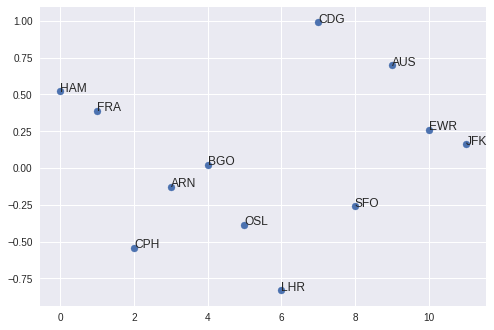

In [23]:
plt.scatter(airport_numbers, all_embeddings)
for name, x_pos, y_pos in zip(airport_names, airport_numbers, all_embeddings):
  print(name, (x_pos, y_pos))
  plt.annotate(name, (x_pos, y_pos))

## Let's try 2d embeddings

In [0]:
input_dim = len(airports)
embedding_dim = 2

model = Sequential()

model.add(Embedding(name='embedding',
                    input_dim=input_dim, 
                    output_dim=embedding_dim, 
                    input_length=1))

model.add(Flatten())

model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=50, activation='relu'))

model.add(Dense(units=dictionary_size, name='output', activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


CPU times: user 7.54 s, sys: 177 ms, total: 7.71 s
Wall time: 4.8 s


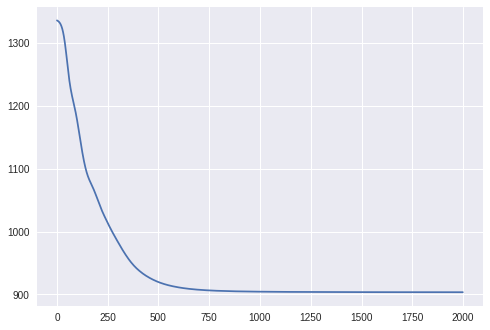

In [25]:
%time history = model.fit(x, Y, epochs=2000, verbose=0)
plt.plot(history.history['loss'])

In [26]:
model.evaluate(x, Y)

12/12 [==============================] - 0s 8ms/step


[903.5745239257812, 0.9166666865348816]

In [27]:
embedding_layer = model.get_layer('embedding')
embedding_model = Model(inputs=model.input, outputs=embedding_layer.output)
embeddings_2d = embedding_model.predict(airport_numbers).reshape(-1, 2)
embeddings_2d

array([[ 0.6742881 ,  0.29210666],
       [ 0.15176655, -0.6326937 ],
       [ 0.5821032 , -0.17998672],
       [ 0.5765059 ,  0.6531455 ],
       [-0.49302372,  0.8037852 ],
       [-0.37935084,  0.32331687],
       [ 0.05946968,  0.60380584],
       [-0.2791268 , -0.6750389 ],
       [-0.56966394, -0.52789724],
       [ 0.48771763, -0.5247084 ],
       [-0.821346  ,  0.23345123],
       [-0.73911935, -0.22454211]], dtype=float32)

HAM (0.6742881, 0.29210666)
FRA (0.15176655, -0.6326937)
CPH (0.5821032, -0.17998672)
ARN (0.5765059, 0.6531455)
BGO (-0.49302372, 0.8037852)
OSL (-0.37935084, 0.32331687)
LHR (0.059469678, 0.60380584)
CDG (-0.2791268, -0.6750389)
SFO (-0.56966394, -0.52789724)
AUS (0.48771763, -0.5247084)
EWR (-0.821346, 0.23345123)
JFK (-0.73911935, -0.22454211)


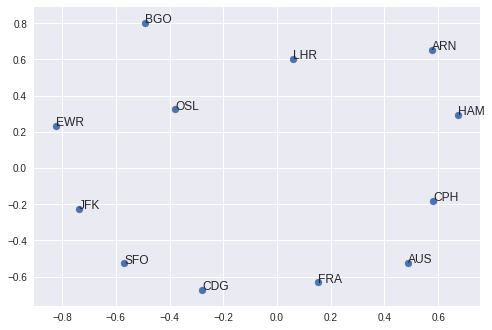

In [28]:
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
for name, x_pos, y_pos in zip(airport_names, embeddings_2d[:, 0], embeddings_2d[:, 1]):
  print(name, (x_pos, y_pos))
  plt.annotate(name, (x_pos, y_pos))

## Not impressed?

* how good embeddings work depends on how you train similarities into them
* a dozen random texts typically do not contain enough information
* retry with the more refined descriptions you can find directly under the airport description on the top of this notebook. Comment it in an rerun the notebook